Before you get into this I just wanna say I'm nowhere near where I wanted to be for this draft, I've been working on this for the past 6 hours straight and still barely have anything working. I've managed to pull and tidy all the data from a singular match (towards the bottom somewhere) but I'm having trouble creating functions to automate this process so I can expand the dataset beyond a single match. I think my plans for this project far exceeded my capabilities, so my final project will definitely have to be scaled back. If I had better knowledge of pandas or python in general maybe I could have met my original expectations but it is what it is. 

I love the game PUBG, it has a very nostalgic place in my heart (despite being only 6 years old) and I have a lot of fond memories with friends on the game. I wanted to see what statistically makes a player place higher in the match. Specific weapons, playstyles, landing location, etc.

Kind of just doing my own thing, I'm not (consciously) following in the footsteps of anyone else

The source of the data is the PUBG API, collected by the game as people play it. It could be valuable to gain insights on the game that you otherwise couldn't.

The data includes players, player stats, match history, leaderboards, specific matches, telemetry events within matches, etc. I'm going to use anything I believe would be interesting to observe in relation to how a player performs in a match.

I managed to bring together and tidy data for a specific match like player name, placement, kills, distance travelled, death location, carepackages looted, time survived, and damage dealt. I have yet to analyze anything because I still don't have a big enough data set.

N/A

N/A

Oh also now I'm getting 404s on stuff that was previously working and I didn't think I changed anything but they were just for testing at the beginning so I don't think its a huge deal but was working on one point haha.

In [1]:
#Explain the purpose of the analysis (what questions and motivations drive you?)
#Explain the starting point (what brought you here, are there others you are following?)
#Explain the source of the data (where did this data come from, what value does it have?)
#Explain the structure of the data (how is it organized, what pieces of information are included, which pieces will you use?) (these last two are the data ethnographies portions)
#Explain what you did (how was the data cleaned/changed, what analysis was conducted and why?)
#Explain what the results mean (what have you learned, what new questions need to be asked, what are your limitations/blindspots?)
#Explain your conclusion (what should your audience take away from the report?)

In [3]:
import pandas as pd
import json
import requests
import base64
import urllib
import numpy
import matplotlib.pyplot as plt

reading in the api key

In [4]:
app_key = pd.read_csv("keys/PUBG.txt")

Creating api call function and header

In [5]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [6]:
header = {'Authorization':'Bearer {}'.format(app_key['Key'].iloc[0]), 'Accept':'application/vnd.api+json'}

Testing the call

In [7]:
test = api_call("https://api.pubg.com/shards/steam/players?filter[playerNames]=ChangChunYuanMan", header)
test_df = pd.DataFrame(test['data'][0])
test_df

200


,type,id,attributes,relationships,links
patchVersion,player,account.619b02706fc04dcea87889fb2e621f42,,NaN,NaN
banType,player,account.619b02706fc04dcea87889fb2e621f42,Innocent,NaN,NaN
clanId,player,account.619b02706fc04dcea87889fb2e621f42,clan.b02c3427046d433d86fd9f0f4924b0da,NaN,NaN
name,player,account.619b02706fc04dcea87889fb2e621f42,ChangChunYuanMan,NaN,NaN
stats,player,account.619b02706fc04dcea87889fb2e621f42,None,NaN,NaN
titleId,player,account.619b02706fc04dcea87889fb2e621f42,pubg,NaN,NaN
shardId,player,account.619b02706fc04dcea87889fb2e621f42,steam,NaN,NaN
matches,player,account.619b02706fc04dcea87889fb2e621f42,NaN,"{'data': [{'type': 'match', 'id': '5529286a-ac...",NaN
assets,player,account.619b02706fc04dcea87889fb2e621f42,NaN,{'data': []},NaN
self,player,account.619b02706fc04dcea87889fb2e621f42,NaN,NaN,https://api.pubg.com/shards/steam/players/acco...


In [61]:
test_df['relationships']['matches']

{'data': [{'type': 'match', 'id': '5529286a-ac6a-4f7f-801f-85d61aaa4ea1'},
  {'type': 'match', 'id': 'd146ac2a-c5a4-42ea-be4c-5f4f8e8d6438'},
  {'type': 'match', 'id': 'f65e3c69-c5ea-4f92-a346-b2798518bf59'},
  {'type': 'match', 'id': '961548d1-76d6-43fb-85e2-ab366467fc0e'},
  {'type': 'match', 'id': '4ffaf76c-05d3-43ac-91de-0ef1d98837c9'},
  {'type': 'match', 'id': '164f431b-da09-442a-9c4c-2e65f411020e'},
  {'type': 'match', 'id': '2dcbb479-b9fb-4b2f-ae0b-a6d111a856a4'},
  {'type': 'match', 'id': '74acb502-908a-40e6-8dde-69a8c7594b08'},
  {'type': 'match', 'id': '2b6c9707-7d54-421e-8f43-efa4acd1044e'}]}

Getting data for this specific match

In [62]:
thematch = api_call("https://api.pubg.com/shards/steam/matches/d146ac2a-c5a4-42ea-be4c-5f4f8e8d6438", header)

200


Getting player stats

In [63]:
matchdf = pd.DataFrame(thematch['included'])
stats_df = pd.DataFrame(matchdf['attributes'][0])
stats_df

,actor,shardId,stats
DBNOs,,steam,4
assists,,steam,1
boosts,,steam,9
damageDealt,,steam,551.88306
deathType,,steam,byplayer
headshotKills,,steam,1
heals,,steam,21
killPlace,,steam,6
killStreaks,,steam,2
kills,,steam,4


Trying to get telemetry data, starting with the id for it

In [64]:
thematch['data']['relationships']['assets']

{'data': [{'type': 'asset', 'id': '7420bd1b-ab41-11ef-81fa-9a6b738fb9e6'}]}

Getting the index for the address

In [68]:
matchdf[matchdf['id'] == '7420bd1b-ab41-11ef-81fa-9a6b738fb9e6']['attributes']

78    {'name': 'telemetry', 'description': '', 'crea...
Name: attributes, dtype: object

Creating a dataframe out of the telemetry data (Thanks for the help here your solution was pretty much dead on)

In [69]:
URL = matchdf[matchdf['id'] == '7420bd1b-ab41-11ef-81fa-9a6b738fb9e6']['attributes'][78]['URL']
telemetry = pd.read_json(URL)
tele_df = pd.DataFrame(telemetry)

_D is the Time <br>
_T is the type of event <br>
common is the status of the current match, isGame = 0 is before match start, 0.1 is on the plane, 0.5 is before zone, 1 is the first zone appears, 1.5 is when it shrinks, 2 is when the next one starts, and so on <br>
character is info about the player the event refers to <br> mostly everything else is specific to the event type

In [70]:
tele_df

,MatchId,PingQuality,_D,_T,accountId,common,character,vehicle,elapsedTime,numAlivePlayers,...,wheelIndex,carePackageUniqueId,carePackageName,swimDistance,maxSwimDepthOfWater,instigator,riders,drivers,gameResultOnFinished,allWeaponStats
0,match.bro.official.pc-2018-32.steam.squad.sea....,,2024-11-25T14:57:17.1932798Z,LogMatchDefinition,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2024-11-25T14:56:06.904Z,LogPlayerLogin,account.dae09a8ecb124a869bd43b4c7992c0f3,{'isGame': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2024-11-25T14:56:06.922Z,LogPlayerCreate,NaN,{'isGame': 0},"{'name': 'QIU-ARVIN', 'teamId': 12, 'health': ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2024-11-25T14:56:06.957Z,LogPlayerLogin,account.b852c5611a894ffdb6662fa616c3e250,{'isGame': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2024-11-25T14:56:06.970Z,LogPlayerCreate,NaN,{'isGame': 0},"{'name': 'LCCSU', 'teamId': 4, 'health': 100, ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49685,NaN,NaN,2024-11-25T15:24:17.358Z,LogHeal,NaN,{'isGame': 8.5},"{'name': 'napani', 'teamId': 19, 'health': 51....",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49686,NaN,NaN,2024-11-25T15:24:23.201Z,LogHeal,NaN,{'isGame': 8.5},"{'name': 'MoVeOn-_', 'teamId': 19, 'health': 1...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49687,NaN,NaN,2024-11-25T15:24:25.373Z,LogHeal,NaN,{'isGame': 8.5},"{'name': 'napani', 'teamId': 19, 'health': 52....",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49688,NaN,NaN,2024-11-25T15:24:31.219Z,LogHeal,NaN,{'isGame': 8.5},"{'name': 'MoVeOn-_', 'teamId': 19, 'health': 1...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I wanted to figure out how to get a list of all the specific types of event. I had a lot of trouble figuring out how to locate the index of a row based on its value, but stack overflow came in clutch as usual

In [71]:
tele_df['_T'].index[tele_df['_T']=='LogParachuteLanding'].tolist()

[2215,
 2231,
 2241,
 2245,
 2247,
 2251,
 2267,
 2269,
 2288,
 2298,
 2319,
 2322,
 2369,
 2375,
 2427,
 2431,
 2467,
 2472,
 2475,
 2487,
 2497,
 2499,
 2501,
 2503,
 2510,
 2513,
 2518,
 2540,
 2563,
 2601,
 2614,
 2621,
 2635,
 2645,
 2697,
 2709,
 2776,
 2795,
 2844,
 2879,
 2906,
 2925,
 2961,
 2972,
 2996,
 3005,
 3060,
 3167,
 3186,
 3194,
 3219,
 3237,
 3247,
 3250,
 3252,
 3260,
 3280,
 3334,
 3354,
 3362,
 3395,
 3446,
 3462,
 3486,
 3512,
 3514,
 3523,
 3528,
 3545,
 3566,
 3569,
 3591,
 3620,
 3630,
 3652,
 3690,
 3735,
 3750,
 3798,
 3841,
 3859,
 3875,
 3896,
 3927,
 4042,
 4168,
 4193,
 4231,
 4245,
 4269,
 4291,
 4337,
 4343,
 4546,
 4987,
 5096,
 5323,
 5379,
 5804,
 6181,
 7117,
 7836,
 7898,
 8246,
 13594,
 25211,
 25511,
 25534,
 25631,
 25653,
 30566,
 30599,
 30616,
 30674,
 30820,
 35239,
 35363,
 36957,
 40822,
 40909,
 46196,
 46280,
 48778]

Here I can get the player behind the event and where it happened

In [72]:
tele_df['_D'][2156]
tele_df.iloc[2156]['character']

{'name': 'GnartuhT',
 'teamId': 15,
 'health': 100,
 'location': {'x': 421232.09375, 'y': 412990.25, 'z': 119103.4375},
 'ranking': 0,
 'individualRanking': 0,
 'accountId': 'account.641ff10babba4b81a6a7b7cbf6a6f64e',
 'isInBlueZone': False,
 'isInRedZone': False,
 'inSpecialZone': 'None',
 'isInVehicle': False,
 'zone': [],
 'type': 'user'}

I need to get the season id for the leaderboard I wanna get

In [73]:
api_call("https://api.pubg.com/shards/steam/seasons/", header)

200


{'data': [{'type': 'season',
   'id': 'division.bro.official.pc-2018-33',
   'attributes': {'isCurrentSeason': True, 'isOffseason': False}},
  {'type': 'season',
   'id': 'division.bro.official.pc-2018-32',
   'attributes': {'isCurrentSeason': False, 'isOffseason': False}},
  {'type': 'season',
   'id': 'division.bro.official.pc-2018-31',
   'attributes': {'isOffseason': False, 'isCurrentSeason': False}},
  {'type': 'season',
   'id': 'division.bro.official.pc-2018-30',
   'attributes': {'isCurrentSeason': False, 'isOffseason': False}},
  {'type': 'season',
   'id': 'division.bro.official.pc-2018-29',
   'attributes': {'isCurrentSeason': False, 'isOffseason': False}},
  {'type': 'season',
   'id': 'division.bro.official.pc-2018-28',
   'attributes': {'isCurrentSeason': False, 'isOffseason': False}},
  {'type': 'season',
   'id': 'division.bro.official.pc-2018-27',
   'attributes': {'isCurrentSeason': False, 'isOffseason': False}},
  {'type': 'season',
   'id': 'division.bro.official.pc

The most recent leaderboard that works is season 6??? It is currently season 33.

In [74]:
leaderboard = api_call("https://api.pubg.com/shards/pc-na/leaderboards/division.bro.official.pc-2018-06/solo", header)
leaderboard

200


{'data': {'type': 'leaderboard',
  'id': 'd895dbfd-cf03-4335-881d-1034c8f1277d',
  'attributes': {'seasonId': 'division.bro.official.pc-2018-06',
   'shardId': 'pc-na',
   'gameMode': 'solo'},
  'relationships': {'players': {'data': [{'type': 'player',
      'id': 'account.2f6161f9becd4f8d9bcac25c5f049be8'},
     {'type': 'player', 'id': 'account.a2465801e62143b3b1fca6cd29949889'},
     {'type': 'player', 'id': 'account.ae876e3afcd243b4b6f3b96c6d306d92'},
     {'type': 'player', 'id': 'account.a33b5918828d48dc93d68f6b3429e9e9'},
     {'type': 'player', 'id': 'account.52aa8c14e05c45eea359fe62c619fc71'},
     {'type': 'player', 'id': 'account.bce91fed038f4b408584473904996a9e'},
     {'type': 'player', 'id': 'account.ce8e3288f4b645528e75a938e485f0de'},
     {'type': 'player', 'id': 'account.fe8dba6b2f7049289ea75f030bd48a3b'},
     {'type': 'player', 'id': 'account.336af7f6f0344dbc8c35516a74cbed14'},
     {'type': 'player', 'id': 'account.b5b3a8c576b5426d985090ef1b0c4966'},
     {'type': '

In [75]:
leaderboard.keys()
#leaderboard['data']['relationships']['players']['data']
leader_df = pd.DataFrame(leaderboard['data']['relationships']['players']['data'])
leader_df

,type,id
0,player,account.2f6161f9becd4f8d9bcac25c5f049be8
1,player,account.a2465801e62143b3b1fca6cd29949889
2,player,account.ae876e3afcd243b4b6f3b96c6d306d92
3,player,account.a33b5918828d48dc93d68f6b3429e9e9
4,player,account.52aa8c14e05c45eea359fe62c619fc71
5,player,account.bce91fed038f4b408584473904996a9e
6,player,account.ce8e3288f4b645528e75a938e485f0de
7,player,account.fe8dba6b2f7049289ea75f030bd48a3b
8,player,account.336af7f6f0344dbc8c35516a74cbed14
9,player,account.b5b3a8c576b5426d985090ef1b0c4966


Here I can see that I can get recent matches from a player

In [76]:
player = api_call("https://api.pubg.com/shards/steam/players/"+leader_df['id'][15], header)
player

200


{'data': {'type': 'player',
  'id': 'account.45c7abec405844ec9f577f38cf8a3c06',
  'attributes': {'name': 'AIIEN6666666',
   'stats': None,
   'titleId': 'pubg',
   'shardId': 'steam',
   'patchVersion': '',
   'banType': 'Innocent',
   'clanId': ''},
  'relationships': {'assets': {'data': []},
   'matches': {'data': [{'type': 'match',
      'id': 'cf268290-f31b-496a-9a2a-a80f86903445'},
     {'type': 'match', 'id': '3cb8f685-2139-49e0-bf7c-e90c724db8d0'},
     {'type': 'match', 'id': 'e1a9007e-e516-4e7e-9279-5405fbaa0169'},
     {'type': 'match', 'id': '02f6ab64-ca10-4e34-9cc7-866cd6fbb810'},
     {'type': 'match', 'id': '801d1445-28de-4077-919d-d0c9588d2e45'}]}},
  'links': {'self': 'https://api.pubg.com/shards/steam/players/account.45c7abec405844ec9f577f38cf8a3c06',
   'schema': ''}},
 'links': {'self': 'https://api.pubg.com/shards/steam/players/account.45c7abec405844ec9f577f38cf8a3c06'},
 'meta': {}}

This was automation stuff that didn't work because the way I was trying to get recent player matches ended up throwing an error if a player didn't have any recent matches and I don't know how to fix that edge case.

In [77]:
#def getRecentMatches(player_id):
  #  match_collection = []
  #  player = api_call("https://api.pubg.com/shards/steam/players/"+player_id, header)
   # for x in range(1):
   #     match_collection.append(player['data']['relationships']['matches']['data'][x]['id'])
   # return match_collection

In [78]:
#match_ids = []
#for x in range(20):
  #  match_ids.append(getRecentMatches(leader_df['id'][x]))
#match_ids.append(getRecentMatches(leader_df['id'][2]))
#leader_df['id'][2]

In [79]:
match_collection

['3b84b9dd-6383-4162-94b0-b96c54c403b4',
 'b675b5f3-9f99-443e-959c-4e016ff0f050',
 'bf958047-2c8a-4185-b3f1-7e728c61f699',
 '9544b04d-4038-4578-9306-29649c578e02',
 'c58a44d5-1122-4fce-a3a0-529401a858c7',
 'fccf2ef1-13c0-4d67-bdaa-97eee812d5a6',
 '7477a20c-14c2-45f7-87f5-65a880bd2f17',
 'a4cc422d-2a18-4528-918b-04a26675f1aa',
 '96de0dd6-0286-45aa-a51f-b3f6625e7cbf',
 '74a8119f-c7f3-4266-9b88-34ad768aac7a',
 '2d60d3d9-c8ab-45a4-b16d-04e72cb3bc6f',
 '47f08dcb-2ce3-4493-b6ec-12cc8266fdae',
 '2cd6fc40-40a2-4f62-8fa5-9d9be6b4fde9',
 '5ea35b02-da9f-4106-9608-5c5b711630fb',
 'e73e18e2-aa3e-40ce-b49e-f095e7e7f745',
 '211d0934-aa3a-4ae8-ba3d-6f4242a55528',
 'b0a9db41-a170-4bd1-8ec4-1618628e5a31',
 'af7da6d2-3104-4057-8548-511c120786b6',
 '4262cb27-0506-490f-b62a-523c152eb174',
 '1aa9b774-a952-46de-a9a3-d7b47bb0a38a',
 'b1256999-9075-4d86-86ed-68c9e47c551a',
 '4ee7bacd-c402-488f-87b3-4a4704865919',
 'f674c9ba-5146-48a2-b0dc-0447053606a3',
 '3cf1ba1f-a41d-4037-85df-e07fe810fa5b',
 '0735bda5-174e-

In [83]:
playerids = pd.DataFrame(thematch['data']['relationships']['rosters']['data'])
players = pd.DataFrame(playerids['id'])

In [85]:
idofmatch = thematch['data']['relationships']['assets']['data'][0]['id']

In [188]:
match_df = pd.DataFrame(thematch['included'])
indexx = match_df[match_df['id'] == idofmatch]['attributes'].index[0]
indexx


'Baltic_Main'

figuring out how to find telemetry data

In [88]:
URLfound = match_df[match_df['id'] == idofmatch]['attributes'][indexx]['URL']
tele = pd.read_json(URLfound)
tele_dff = pd.DataFrame(tele)

In [89]:
deaths = tele_dff['_T'].index[tele_dff['_T']=='LogPlayerKillV2'].tolist()
#tele_dff.iloc[2426].keys()
deaths[1]
tele_dff.iloc[deaths[98]]['victim']

{'name': 'TEQUILAHYZ',
 'teamId': 3,
 'health': 0,
 'location': {'x': 554182.1875, 'y': 199395.84375, 'z': 4876.41015625},
 'ranking': 5,
 'individualRanking': 12,
 'accountId': 'account.189b654f04134f949990f27fb13a84ad',
 'isInBlueZone': True,
 'isInRedZone': False,
 'inSpecialZone': 'None',
 'isInVehicle': False,
 'zone': [],
 'type': 'user'}

This is the start of trying to automate this stuff with functions

And this is the end

In [750]:
rankings = pd.DataFrame()
tele_dff.iloc[deaths[98]]['victim']
for x in range(0,99):
    rankings = pd.concat([rankings, pd.DataFrame({
    "Position": [tele_dff.iloc[deaths[x]]['victim']['ranking']],
    "Player": [tele_dff.iloc[deaths[x]]['victim']['name']],
    "Type": [tele_dff.iloc[deaths[x]]['victim']['type']],
    "Death Location": [tele_dff.iloc[deaths[x]]['victim']['location']],
    "Death Reason": [tele_dff.iloc[deaths[x]]['killerDamageInfo']['damageReason']]
    
})], ignore_index=True)

kills = pd.DataFrame()

for x in range(len(deaths)):
    if not(tele_dff.iloc[deaths[x]]['killerDamageInfo']['damageCauserName']==''):
        kills = pd.concat([kills, pd.DataFrame({
        "Player": [tele_dff.iloc[deaths[x]]['killer']['name']],
        "Weapons Used": [tele_dff.iloc[deaths[x]]['killerDamageInfo']['damageCauserName']],
        })], ignore_index=True)

#test = pd.DataFrame(tele_dff.iloc[deaths[98]]['victim'])
#test
#tele_dff.iloc[deaths[98]]['victim']


#row
#for x in deaths:
   # print(x)
rankings
kills = kills.groupby('Player')['Weapons Used'].apply(list).reset_index()
#tele_dff.iloc[deaths[98]]['killerDamageInfo']['damageCauserName']
#tele_dff.iloc[deaths[84]]['dBNODamageInfo']['damageReason']
#tele_dff.iloc[deaths[106]]['killerDamageInfo']['damageCauserName']
kills
tele_dff.iloc[deaths[8]]['killerDamageInfo']['damageCauserName'][4:-2]

'M16A4'

In [93]:
pd.set_option('display.max_rows', 1000)

matchend = tele_dff['_T'].index[tele_dff['_T']=='LogMatchEnd'][0]

newranking = pd.DataFrame()
info = tele_dff.iloc[matchend]['characters']
for x in range(0,100):
    newranking = pd.concat([newranking, pd.DataFrame({
    "Position": [info[x]['character']['ranking']],
    "Player": [info[x]['character']['name']],
    "Type": [info[x]['character']['type']]
    })], ignore_index=True)

newnew = pd.concat([rankings,newranking], ignore_index=True, )
newnewtest = rankings.merge(newranking, how='outer')
newnewtest


,Position,Player,Type,Death Location,Death Reason
0,0,1RRtCn8Q1pwsI,user,"{'x': 378320.625, 'y': 135772.546875, 'z': 502...",TorsoShot
1,0,4AM_664859,user,"{'x': 204814.59375, 'y': 276543.59375, 'z': 11...",TorsoShot
2,0,77sevenGG,user,"{'x': 464852.15625, 'y': 650780.3125, 'z': 55....",TorsoShot
3,0,98kdeemeng,user,"{'x': 464352.71875, 'y': 647857.875, 'z': 55.9...",LegShot
4,0,Adoro-,user,"{'x': 516555.90625, 'y': 224429.453125, 'z': 2...",HeadShot
5,0,Asong169,user,"{'x': 546110.0625, 'y': 218100.9375, 'z': 745....",PelvisShot
6,0,BOTVapeStore69,user,"{'x': 601899.4375, 'y': 478019.03125, 'z': 455...",HeadShot
7,0,BWRTYQj,user,"{'x': 626137.625, 'y': 605000.625, 'z': 62.159...",TorsoShot
8,0,Berysay,user,"{'x': 599080.1875, 'y': 477076.1875, 'z': 506....",TorsoShot
9,0,Bobocet,user,"{'x': 516999, 'y': 224614.84375, 'z': 2173.530...",ArmShot


In [98]:
incl = match_df
#incl['type']
participants = incl.loc[incl['type'] == 'participant'].index.tolist()
#match['included']
participants
newdf = pd.DataFrame()
for x in participants:
    #pd.concat([pd.DataFrame(incl['attributes'][x]),newdf], axis=0, ignore_index=True)
    #newdf.append(pd.DataFrame(incl['attributes'][x]))
    newdf = pd.concat([newdf, pd.DataFrame({
    "Player": [incl['attributes'][x]['stats']['name']],
    "Kills": [incl['attributes'][x]['stats']['kills']],
    "Dmg Dealt": [incl['attributes'][x]['stats']['damageDealt']],
    "Dist Walked": [incl['attributes'][x]['stats']['walkDistance']],
    "Longest Kill": [incl['attributes'][x]['stats']['longestKill']],
    "Time Survived": [incl['attributes'][x]['stats']['timeSurvived']],
    })], ignore_index=True)
#incl['attributes'][6]
#incl.keys()
#newdf
#pd.DataFrame(incl['attributes'][0])
newdf


,Player,Kills,Dmg Dealt,Dist Walked,Longest Kill,Time Survived
0,WoFang-Bu-Xia-Ta,4,551.883060,3890.784700,50.131710,1412
1,HuYa-13988224,0,57.809998,96.802030,0.000000,186
2,YuanQiSaoNan,1,80.741880,1392.001700,13.870780,1234
3,DucTuyen2207,0,99.999990,376.007970,0.000000,225
4,TEQUILAHYZ,1,328.288150,1446.349500,143.514140,1274
5,WaanZii,0,0.000000,1174.590700,0.000000,1412
6,IBBLONG-,0,0.000000,204.523990,0.000000,240
7,ConanRock,1,313.324100,1250.771000,35.193540,1412
8,Berysay,0,66.445820,102.220190,0.000000,167
9,ChangChunYuanMan,1,379.688700,1278.167200,21.468176,895


In [99]:
newestdf = newnewtest.merge(newdf,how='left')
newestdf

,Position,Player,Type,Death Location,Death Reason,Kills,Dmg Dealt,Dist Walked,Longest Kill,Time Survived
0,0,1RRtCn8Q1pwsI,user,"{'x': 378320.625, 'y': 135772.546875, 'z': 502...",TorsoShot,1,324.000000,105.516250,36.783024,362
1,0,4AM_664859,user,"{'x': 204814.59375, 'y': 276543.59375, 'z': 11...",TorsoShot,0,80.992080,445.293200,0.000000,417
2,0,77sevenGG,user,"{'x': 464852.15625, 'y': 650780.3125, 'z': 55....",TorsoShot,0,82.560000,477.582500,0.000000,358
3,0,98kdeemeng,user,"{'x': 464352.71875, 'y': 647857.875, 'z': 55.9...",LegShot,1,172.600000,424.405820,1.383169,311
4,0,Adoro-,user,"{'x': 516555.90625, 'y': 224429.453125, 'z': 2...",HeadShot,0,0.000000,1221.277800,0.000000,1136
5,0,Asong169,user,"{'x': 546110.0625, 'y': 218100.9375, 'z': 745....",PelvisShot,0,57.650000,368.776460,0.000000,1386
6,0,BOTVapeStore69,user,"{'x': 601899.4375, 'y': 478019.03125, 'z': 455...",HeadShot,0,0.000000,204.818790,0.000000,224
7,0,BWRTYQj,user,"{'x': 626137.625, 'y': 605000.625, 'z': 62.159...",TorsoShot,0,56.826000,79.365210,0.000000,133
8,0,Berysay,user,"{'x': 599080.1875, 'y': 477076.1875, 'z': 506....",TorsoShot,0,66.445820,102.220190,0.000000,167
9,0,Bobocet,user,"{'x': 516999, 'y': 224614.84375, 'z': 2173.530...",ArmShot,0,0.000000,1048.069300,0.000000,1136


In [107]:
landing = tele_dff['_T'].index[tele_dff['_T']=='LogParachuteLanding'].tolist()
landing
landed_df = pd.DataFrame()
for x in landing:
    landed_df = pd.concat([landed_df, pd.DataFrame({
    "Player": [tele_dff['character'][x]['name']],
    "Landed Location": [tele_dff['character'][x]['location']]
    })], ignore_index=True)
#tele_dff['character'][3510]

landed_df = landed_df.drop_duplicates(subset=['Player'])
landed_df

,Player,Landed Location
0,baizai66,"{'x': 633402.875, 'y': 612005.5625, 'z': 122.6..."
1,TsukasaHwan,"{'x': 633024.6875, 'y': 612221.6875, 'z': 261...."
2,BIEDAWOAAA---,"{'x': 627861.75, 'y': 609943.25, 'z': 336.8737..."
3,IBBLONG-,"{'x': 629871.875, 'y': 607361, 'z': 447.885314..."
4,Shiqi-_-17_,"{'x': 622950.5625, 'y': 614832.9375, 'z': 395...."
5,LCCSU,"{'x': 631938.875, 'y': 614319.25, 'z': 126.346..."
6,QIU-ARVIN,"{'x': 630610.75, 'y': 609687.375, 'z': 363.981..."
7,BWRTYQj,"{'x': 621263.3125, 'y': 601643.25, 'z': 352.39..."
8,G-HD-WZ,"{'x': 611093.0625, 'y': 596839.8125, 'z': 364...."
9,dhjuidsaN,"{'x': 626846, 'y': 614104.6875, 'z': 106.40542..."


In [821]:

carepkg = tele_dff['_T'].index[tele_dff['_T']=='LogItemPickupFromCarepackage'].tolist()

carepkg_df = pd.DataFrame()
for x in carepkg:
    carepkg_df = pd.concat([carepkg_df, pd.DataFrame({
    "Player": [tele_dff['character'][x]['name']],
    "CarepackageLooted": [tele_dff['item'][x]['itemId'][5:-2]],
    })], ignore_index=True, copy=False)
#tele_dff['character'][3510]
#carepkg_df = carepkg_df.drop_duplicates()
carepkg_df = carepkg_df.groupby('Player')['CarepackageLooted'].apply(list).reset_index()
carepkg_df.keys()

Index(['Player', 'CarepackageLooted'], dtype='object')

In [781]:
vehicle_df = pd.DataFrame()

vehicle = tele_dff['_T'].index[tele_dff['_T']=='LogVehicleRide'].tolist()
for x in vehicle:
    if not(tele_dff['vehicle'][x]['vehicleType']=='TransportAircraft'):
        vehicle_df = pd.concat([vehicle_df, pd.DataFrame({
        "Player": [tele_dff['character'][x]['name']],
        "Vehicle Ridden": [tele_dff['vehicle'][x]['vehicleId']],
        })], ignore_index=True, copy=False)
vehicle_df = vehicle_df.drop_duplicates().reset_index()


vehicle_df = vehicle_df.groupby('Player')['Vehicle Ridden'].apply(list).reset_index()

vehicle_df

,Player,Vehicle Ridden
0,1dashuaigeovo,"[Dacia_A_03_v2_Esports_C, Uaz_B_01_C]"
1,Adoro-,[Dacia_A_03_v2_Esports_C]
2,Asong169,[Uaz_B_01_esports_C]
3,Ayiyi-,"[Uaz_B_01_esports_C, BP_BRDM_C]"
4,Bobocet,"[BP_Motorbike_04_C, Dacia_A_03_v2_Esports_C]"
5,ChangChunYuanMan,"[Buggy_A_02_C, Dacia_A_02_v2_C, Uaz_B_01_espor..."
6,ChiBui,[BP_Motorbike_04_C]
7,ConanRock,[Uaz_B_01_esports_C]
8,DG-Rain,"[Dacia_A_03_v2_Esports_C, Dacia_A_04_v2_C]"
9,DXX332,"[Buggy_A_03_C, Uaz_B_01_C]"


In [108]:
final = newestdf.merge(carepkg_df,how='left')
final

,Position,Player,Type,Death Location,Death Reason,Kills,Dmg Dealt,Dist Walked,Longest Kill,Time Survived,CarepackageLooted
0,0,1RRtCn8Q1pwsI,user,"{'x': 378320.625, 'y': 135772.546875, 'z': 502...",TorsoShot,1,324.000000,105.516250,36.783024,362,NaN
1,0,4AM_664859,user,"{'x': 204814.59375, 'y': 276543.59375, 'z': 11...",TorsoShot,0,80.992080,445.293200,0.000000,417,NaN
2,0,77sevenGG,user,"{'x': 464852.15625, 'y': 650780.3125, 'z': 55....",TorsoShot,0,82.560000,477.582500,0.000000,358,NaN
3,0,98kdeemeng,user,"{'x': 464352.71875, 'y': 647857.875, 'z': 55.9...",LegShot,1,172.600000,424.405820,1.383169,311,NaN
4,0,Adoro-,user,"{'x': 516555.90625, 'y': 224429.453125, 'z': 2...",HeadShot,0,0.000000,1221.277800,0.000000,1136,NaN
5,0,Asong169,user,"{'x': 546110.0625, 'y': 218100.9375, 'z': 745....",PelvisShot,0,57.650000,368.776460,0.000000,1386,NaN
6,0,BOTVapeStore69,user,"{'x': 601899.4375, 'y': 478019.03125, 'z': 455...",HeadShot,0,0.000000,204.818790,0.000000,224,NaN
7,0,BWRTYQj,user,"{'x': 626137.625, 'y': 605000.625, 'z': 62.159...",TorsoShot,0,56.826000,79.365210,0.000000,133,NaN
8,0,Berysay,user,"{'x': 599080.1875, 'y': 477076.1875, 'z': 506....",TorsoShot,0,66.445820,102.220190,0.000000,167,NaN
9,0,Bobocet,user,"{'x': 516999, 'y': 224614.84375, 'z': 2173.530...",ArmShot,0,0.000000,1048.069300,0.000000,1136,NaN


Basically my entire approach to this was make dataframe > make another and merge > make another and merge, and so on. I don't know if thats the best method but it works for the most part!

Manual match ids list I made because gathering them automatically from the leaderboard didn't work for reasons mentioned before.

In [9]:
def getmatch(matchid):
    match = api_call('https://api.pubg.com/shards/steam/matches/'+matchid,header)
    match_df = pd.DataFrame(match['included'])

    mapName = match['data']['attributes']['mapName']
    
    idofmatch = match['data']['relationships']['assets']['data'][0]['id']
    indexx = match_df[match_df['id'] == idofmatch]['attributes'].index[0]
    
    URLfound = match_df[match_df['id'] == idofmatch]['attributes'][indexx]['URL']
    tele = pd.read_json(URLfound)
    tele_df = pd.DataFrame(tele)
    return(match_df, tele_df, mapName)

In [13]:
def collect(match_df, tele_df):
    
    deaths = tele_df['_T'].index[tele_df['_T']=='LogPlayerKillV2'].tolist()
    
    rankings = pd.DataFrame()
    
    for x in deaths:
        rankings = pd.concat([rankings, pd.DataFrame({
        "Position": [tele_df.iloc[x]['victim']['ranking']],
        "Player": [tele_df.iloc[x]['victim']['name']],
        "Type": [tele_df.iloc[x]['victim']['type']],
        "Death Location": [tele_df.iloc[x]['victim']['location']],
        "Death Reason": [tele_df.iloc[x]['killerDamageInfo']['damageReason']]
        })], ignore_index=True)


    matchend = tele_df['_T'].index[tele_df['_T']=='LogMatchEnd'][0]

    newranking = pd.DataFrame()
    
    info = tele_df.iloc[matchend]['characters']
    
    for x in range(0, len(info)):
        newranking = pd.concat([newranking, pd.DataFrame({
        "Position": [info[x]['character']['ranking']],
        "Player": [info[x]['character']['name']],
        "Type": [info[x]['character']['type']]
        })], ignore_index=True)
    #tele_dff.iloc[25473]['characters'][1]['character']
    
    final_df = rankings.merge(newranking, how='outer')
    
    #######
    
    kills = pd.DataFrame()

    for x in range(len(deaths)):
        if not(tele_df.iloc[deaths[x]]['killerDamageInfo']['damageCauserName']==''):
            kills = pd.concat([kills, pd.DataFrame({
            "Player": [tele_df.iloc[deaths[x]]['killer']['name']],
            "Weapons Used": [tele_df.iloc[deaths[x]]['killerDamageInfo']['damageCauserName'][4:-2]],
            })], ignore_index=True)
    kills = kills.groupby('Player')['Weapons Used'].apply(list).reset_index()
    
    final_df = final_df.merge(kills, how='outer')
    
    #######
    
    participants = match_df.loc[match_df['type'] == 'participant'].index.tolist()
    #match['included']
    participants
    newdf = pd.DataFrame()
    for x in participants:
        #pd.concat([pd.DataFrame(incl['attributes'][x]),newdf], axis=0, ignore_index=True)
        #newdf.append(pd.DataFrame(incl['attributes'][x]))
        newdf = pd.concat([newdf, pd.DataFrame({
        "Player": [match_df['attributes'][x]['stats']['name']],
        "Kills": [match_df['attributes'][x]['stats']['kills']],
        "Dmg Dealt": [match_df['attributes'][x]['stats']['damageDealt']],
        "Dist Walked": [match_df['attributes'][x]['stats']['walkDistance']],
        "Longest Kill": [match_df['attributes'][x]['stats']['longestKill']],
        "Time Survived": [match_df['attributes'][x]['stats']['timeSurvived']],
        })], ignore_index=True)

    final_df = final_df.merge(newdf,how='left')

    #######
    
    landing = tele_df['_T'].index[tele_df['_T']=='LogParachuteLanding'].tolist()
    landed_df = pd.DataFrame()
    
    for x in landing:
        landed_df = pd.concat([landed_df, pd.DataFrame({
        "Player": [tele_df['character'][x]['name']],
        "Landed Location": [tele_df['character'][x]['location']]
        })], ignore_index=True)
   
    
    landed_df = landed_df.drop_duplicates(subset=['Player'])

    
    final_df = final_df.merge(landed_df,how='left')

    #######
    
    care = tele_df['_T'].index[tele_df['_T']=='LogItemPickupFromCarepackage'].tolist()
    
    care_df = pd.DataFrame()
    
    for x in care:
        care_df = pd.concat([care_df, pd.DataFrame({
        "Player": [tele_df['character'][x]['name']],
        "CarepackageLooted": [tele_df['item'][x]['itemId'][5:-2]]
        })], ignore_index=True, copy=False)


    #care_df = care_df.groupby('Player')['CarepackageLooted'].apply(list).reset_index()
  
    #final_df = final_df.merge(care_df,how='left')

    #######
    
    vehicle_df = pd.DataFrame()

    vehicle = tele_df['_T'].index[tele_df['_T']=='LogVehicleRide'].tolist()
    for x in vehicle:
        if not(tele_df['vehicle'][x]['vehicleType']=='TransportAircraft'):
            vehicle_df = pd.concat([vehicle_df, pd.DataFrame({
            "Player": [tele_df['character'][x]['name']],
            "Vehicle Ridden": [tele_df['vehicle'][x]['vehicleId']]
            })], ignore_index=True, copy=False)
    vehicle_df = vehicle_df.drop_duplicates().reset_index()
    
    
    vehicle_df = vehicle_df.groupby('Player')['Vehicle Ridden'].apply(list).reset_index()
    
    final_df = final_df.merge(vehicle_df,how='left')

    #######
    
    return final_df




In [11]:
match_collection = ['3b84b9dd-6383-4162-94b0-b96c54c403b4',
     'b675b5f3-9f99-443e-959c-4e016ff0f050',
     'bf958047-2c8a-4185-b3f1-7e728c61f699',
     '9544b04d-4038-4578-9306-29649c578e02',
     'c58a44d5-1122-4fce-a3a0-529401a858c7',
     'fccf2ef1-13c0-4d67-bdaa-97eee812d5a6',
     '7477a20c-14c2-45f7-87f5-65a880bd2f17',
     'a4cc422d-2a18-4528-918b-04a26675f1aa',
     '96de0dd6-0286-45aa-a51f-b3f6625e7cbf',
     '74a8119f-c7f3-4266-9b88-34ad768aac7a',
     '2d60d3d9-c8ab-45a4-b16d-04e72cb3bc6f',
     '47f08dcb-2ce3-4493-b6ec-12cc8266fdae',
     '2cd6fc40-40a2-4f62-8fa5-9d9be6b4fde9',
     '5ea35b02-da9f-4106-9608-5c5b711630fb',
     'e73e18e2-aa3e-40ce-b49e-f095e7e7f745',
     '211d0934-aa3a-4ae8-ba3d-6f4242a55528',
     'b0a9db41-a170-4bd1-8ec4-1618628e5a31',
     'af7da6d2-3104-4057-8548-511c120786b6',
     '4262cb27-0506-490f-b62a-523c152eb174',
     '1aa9b774-a952-46de-a9a3-d7b47bb0a38a',
     'b1256999-9075-4d86-86ed-68c9e47c551a',
     '4ee7bacd-c402-488f-87b3-4a4704865919',
     'f674c9ba-5146-48a2-b0dc-0447053606a3',
     '3cf1ba1f-a41d-4037-85df-e07fe810fa5b',
     '0735bda5-174e-43ee-9cd4-7ff98c6663bd',
     '4cdfc06a-0317-4bb0-b669-aa1d48f8f881',
     'e1ed2c9b-b9b7-4d7f-a2cd-4bf3b22fd8d9',
     '9f845b99-f9da-4817-8166-ba15940077e5',
     'ef68c7a9-10b1-4cd5-b548-87108d2d5a44',
     '7423f7f2-4acd-453e-b50e-0c88cd3cc357',
     '0b4adaba-fb20-40c8-8d0e-ffd805457b40',
     '78940f43-0b01-48ea-88a4-e83ef3f46d5d',
     '099175e5-2c19-4ad2-886c-91ecab47ef53',
     '1c4a25b2-432b-43c0-a6b1-1bf9449c36e5',
     'ba4eed5e-5602-4e6b-8e36-ba509bc163ae',
     'a8eb64da-01f1-46c0-8c24-aef9c4bebfa3',
     '1e28a132-5be4-4b4c-a1c0-ee2d6311b683',
     '286c91bf-1b87-4f3b-a445-04b0d46f56e9',
     'c629f704-347f-4108-b0bb-58cdd0abb6f1',
     'eaf82bb1-0a8a-434f-ad3c-003ffb4fafa7',
     '92d4c014-0726-452f-90a3-45078f47ced3',
     'e6da6a6d-092d-4210-a897-c35d9cf35f8b',
     '479d4c95-2516-49aa-98b2-3789279832ac',
     'b85228be-34ce-4624-9a43-a297a76b60da',
     'bce6d36e-8641-4a26-b416-2dc980d0f60d',
     '0b928924-0bf3-4b64-b1f8-9ccebf684c5b',
     '34a2b60a-0eb5-499c-afae-49735e479e18',
     'a28cda17-790d-4a6a-95bd-effdc89f9c9b',
     '502b5f14-89f0-4cbb-b280-f4b9e98d7842',
     'f63e2c97-559b-4069-9a34-de900b86225f',
     'b25f0fee-fba3-4b56-9d4b-374d5d48c64a',
     '8f4279ee-36b9-4334-8bac-c7c7c3bd89e9',
     '3d470152-3707-452a-893a-05d1cd3f3a25',
     '27989b7a-a373-4b7b-ac40-eba679aaaa2c',
     '5a66c05f-7ce0-45b2-b6f3-26a0f7e23775',
     'a3772cdf-f9fe-40ad-975a-dcf9f72b707d',
     '34c72043-27a7-4313-8ff9-0d442dd6e7dc',
     '02f6ab64-ca10-4e34-9cc7-866cd6fbb810',
     '801d1445-28de-4077-919d-d0c9588d2e45',
     '4173f104-c89b-4dd4-aa27-43c9b7bb01a3',
     'a5fd33ed-9b38-4d3d-8c58-19e17260adb3',
     '801f67d4-d08b-46a0-b1ad-e5299eba55d4',
     'dd0b0708-a28e-4015-ba3b-8a7df9a5cb7a',
     '24b2af19-1483-46ea-9ebe-947dc4678e65',
     'fa6b715c-3059-4bbb-a50e-65a4ee21566e']


In [203]:
final_df = pd.DataFrame()
#for x in range(len(match_collection)):
    #getmatch()
#print(getmatch(match_collection[0])[0])
#collect(getmatch(match_collection[0])[1])
collect(getmatch(match_collection[0])[0],getmatch(match_collection[0])[1])

200
200


,Position,Player,Type,Death Location,Death Reason,Weapons Used,Kills,Dmg Dealt,Dist Walked,Longest Kill,Time Survived,Landed Location,CarepackageLooted
0,1.0,BaiTianAn,user,NaN,NaN,NaN,7,731.680050,3554.220000,132.977980,1377,"{'x': 145996.703125, 'y': 363269.875, 'z': 162...",NaN
1,2.0,Chas_111,user,"{'x': 193673.3125, 'y': 199140.71875, 'z': 101...",LegShot,[WeapMP5K_C],1,159.052550,2512.217300,36.078934,1374,"{'x': 95743.6875, 'y': 291125.28125, 'z': 5349...",NaN
2,3.0,GYQ2013,user,"{'x': 186698.40625, 'y': 203834.640625, 'z': 1...",TorsoShot,"[WeapVector_C, WeapQBZ95_C, WeapAUG_C, WeapAUG...",5,686.802550,3123.614000,93.246260,1244,"{'x': 250048.21875, 'y': 208838.234375, 'z': 4...",True
3,4.0,Lecuma46,user,"{'x': 156699.125, 'y': 197435.9375, 'z': 1520....",,NaN,0,0.000000,1309.597700,0.000000,1207,"{'x': 80277.9375, 'y': 161112.296875, 'z': 185...",NaN
4,5.0,Roockyi_,user,"{'x': 176111.765625, 'y': 196071.6875, 'z': 18...",TorsoShot,"[WeapKar98k_C, WeapL6_C]",2,319.239560,1690.931500,170.516880,1200,"{'x': 123293.5546875, 'y': 167867.984375, 'z':...",True
5,6.0,SevenKingChen001,user,"{'x': 202651.046875, 'y': 200096.71875, 'z': 9...",PelvisShot,"[WeapAK47_C, WeapAK47_C, WeapACE32_C]",3,300.000000,683.623200,43.259083,1160,"{'x': 217056.265625, 'y': 237154.78125, 'z': 1...",NaN
6,7.0,ifymbabb,user_ai,"{'x': 168677.375, 'y': 213344.671875, 'z': 158...",TorsoShot,NaN,0,27.732120,2123.409200,0.000000,1422,"{'x': 143397.828125, 'y': 265693.96875, 'z': 2...",NaN
7,8.0,lv147_258lv,user_ai,"{'x': 159100.796875, 'y': 220614.109375, 'z': ...",,NaN,0,0.000000,282.713130,0.000000,1422,"{'x': 158206.546875, 'y': 219211.140625, 'z': ...",NaN
8,9.0,Trident-Poseidon,user,"{'x': 177659.859375, 'y': 268472, 'z': 263}",,NaN,0,0.000000,1260.052900,0.000000,1083,"{'x': 172394.921875, 'y': 375697.25, 'z': 128....",NaN
9,10.0,bloodqw,user,"{'x': 294858.46875, 'y': 292870.9375, 'z': 412...",,[WeapUMP_C],1,100.000000,756.942260,3.055463,1081,"{'x': 239625.765625, 'y': 345254.8125, 'z': 19...",NaN


In [196]:
getmatch(match_collection[3])[2]

200


'Baltic_Main'

In [130]:
bigboy_df = pd.DataFrame()

for x in range(len(match_collection)-1):
    if getmatch(match_collection[x])[2] == 'Baltic_Main':
        bigboy_df = pd.concat([bigboy_df, collect(getmatch(match_collection[x])[0],getmatch(match_collection[x])[1])], ignore_index=True)



200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
404


KeyError: 'included'

In [131]:
bigboy_df

,Position,Player,Type,Death Location,Death Reason,Weapons Used,Kills,Dmg Dealt,Dist Walked,Longest Kill,Time Survived,Landed Location,Vehicle Ridden
0,95,1Nana-,user,"{'x': 220704.046875, 'y': 393262.375, 'z': 169...",TorsoShot,"[AK47, AK47, AK47]",3,300.000000,59.02305,14.654496,91,"{'x': 215421.921875, 'y': 396051.125, 'z': 750...",NaN
1,75,ABS_12-32,user_ai,"{'x': 510744.5625, 'y': 224370.625, 'z': -543....",,NaN,0,0.000000,345.50632,0.000000,441,"{'x': 509058.84375, 'y': 242978.46875, 'z': 21...",NaN
2,70,AMIRRA__78,user_ai,"{'x': 314792.0625, 'y': 351998.4375, 'z': 869....",LegShot,[M16A4],1,100.000000,612.94470,0.000000,468,"{'x': 301582.3125, 'y': 374320.90625, 'z': 142...",NaN
3,49,Abr_ilau,user_ai,"{'x': 569164.3125, 'y': 264286.09375, 'z': 798...",TorsoShot,NaN,0,0.000000,1649.80760,0.000000,741,"{'x': 637668.8125, 'y': 324917.3125, 'z': 897....",NaN
4,63,AbsCati_pm,user_ai,"{'x': 264574.75, 'y': 315680.21875, 'z': 4515....",TorsoShot,NaN,0,22.032198,1316.22700,0.000000,630,"{'x': 233952.15625, 'y': 374006.46875, 'z': 62...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,99,tao_tongxue,user_ai,"{'x': 542916.875, 'y': 461713.6875, 'z': 260.9...",None,NaN,0,90.000000,0.00000,0.000000,303,"{'x': 545907.625, 'y': 461743.09375, 'z': 283....",NaN
1194,64,tgdtgdj_gh789,user_ai,"{'x': 533498.3125, 'y': 491299.875, 'z': 754.8...",LegShot,NaN,0,37.778973,487.09695,0.000000,632,"{'x': 534323.4375, 'y': 487936.90625, 'z': 271...",NaN
1195,79,tianh_aizhiyi,user_ai,"{'x': 607317.5625, 'y': 369931.3125, 'z': 1472...",TorsoShot,NaN,0,0.000000,141.77763,0.000000,446,"{'x': 606264.75, 'y': 383182.40625, 'z': 5923....",NaN
1196,66,vkybitty0323,user_ai,"{'x': 477739.5625, 'y': 406275.78125, 'z': 641...",TorsoShot,NaN,0,0.000000,1104.06020,0.000000,623,"{'x': 506995.3125, 'y': 335145.75, 'z': 1562.6...",NaN


In [132]:
bigboy_df[(bigboy_df['Position']==1)]


,Position,Player,Type,Death Location,Death Reason,Weapons Used,Kills,Dmg Dealt,Dist Walked,Longest Kill,Time Survived,Landed Location,Vehicle Ridden
5,1,AlaSHan-XiaoZhi,user,NaN,NaN,"[AUG, AUG]",2,200.00000,517.3291,14.926426,1447,"{'x': 240884, 'y': 436082.3125, 'z': 1505.4133...","[BP_Bicycle_Succubus_C, Uaz_B_01_esports_C]"
148,1,Lecuma46,user,NaN,NaN,"[B_01_esports, B_01_esports, B_01_esports, B_0...",13,1045.37410,1585.1445,77.743620,1629,"{'x': 493903.6875, 'y': 186952.90625, 'z': 421...","[Uaz_B_01_esports_C, BP_DBX_LGD_C, BP_CoupeRB_..."
200,1,AG_wqgc995vg,user,NaN,NaN,"[AK47, MP5K, AK47, Kar98k, BerylM762, Kar98k, ...",8,824.99110,1275.4764,103.667500,1499,"{'x': 713537.8125, 'y': 337846.53125, 'z': 97....","[BP_Motorbike_04_C, Dacia_A_02_v2_C]"
336,1,Lecuma46,user,NaN,NaN,"[vz61Skorpion, erFaust100M_Projectile, vz61Sko...",4,364.20000,1283.6753,15.625069,1497,"{'x': 357076.59375, 'y': 240720.703125, 'z': 5...","[Uaz_B_01_esports_C, BP_DBX_LGD_C]"
437,1,Lecuma46,user,NaN,NaN,"[erFaust100M_Projectile, erFaust100M_Projectile]",2,172.48117,1558.4808,34.897274,1492,"{'x': 408467.28125, 'y': 346174.84375, 'z': 23...","[Uaz_B_01_esports_C, BP_DBX_LGD_C, BP_BRDM_C]"
549,1,PTG-1060TI,user,NaN,NaN,"[erFemale_A, MP5K, MP5K, AK47, AK47, AK47, ACE...",12,1195.63960,1472.5011,123.904366,1520,"{'x': 223090.1875, 'y': 396034, 'z': 930.28234...",[Dacia_A_03_v2_Esports_C]
603,1,Aita_07,user,NaN,NaN,"[HK416, Mini14, Mini14, HK416, HK416, Mini14]",6,522.21580,2154.1648,121.516920,1530,"{'x': 383385.9375, 'y': 484091.3125, 'z': 2643...","[Uaz_B_01_C, BP_CoupeRB_C]"
743,1,Lecuma46,user,NaN,NaN,"[Thompson, vz61Skorpion, B_01_esports, erFaust...",4,377.00000,1885.1418,41.056324,1471,"{'x': 257560.015625, 'y': 252277.453125, 'z': ...","[Uaz_B_01_esports_C, BP_DBX_LGD_C, BP_CoupeRB_C]"
858,1,VjWOckyTvFA1X,user,NaN,NaN,"[BerylM762, SKS, SKS, SKS, AWM]",5,349.52094,706.7631,261.309940,1164,"{'x': 472659.5, 'y': 472516.90625, 'z': 423.37...","[BP_EmergencyPickupVehicle_C, BP_Urus_EP_C]"
945,1,NJHunter,user,NaN,NaN,"[BerylM762, BerylM762, a_A_03_v2_Esports, MG3,...",5,554.09393,1051.8707,32.042790,1480,"{'x': 190332.078125, 'y': 226764.84375, 'z': 2...",[Dacia_A_03_v2_Esports_C]


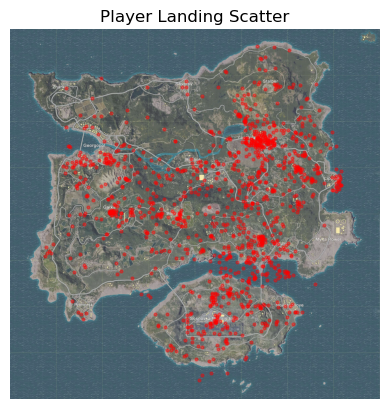

In [133]:
xloc = bigboy_df['Landed Location'].apply(pd.Series)['x']
yloc = bigboy_df['Landed Location'].apply(pd.Series)['y']

fig1, ax1 = plt.subplots()
extent = (0, 800000, 800000, 0)
im = plt.imread('erangel.png')
ax1.imshow(im,zorder=1, alpha=0.8, extent=extent)

ax1.scatter(xloc,yloc, s=4, zorder=2, c='red',alpha=0.4,)
ax1.set_title('Player Landing Scatter')
ax1.axis('off')

plt.show()
#bigboy_df['Landed Location'].apply(pd.Series)['x']

In [134]:
from matplotlib.colors import ListedColormap

cmap = plt.cm.inferno
my_cmap = cmap(numpy.arange(cmap.N))
my_cmap[:,-1] = numpy.linspace(0.7, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

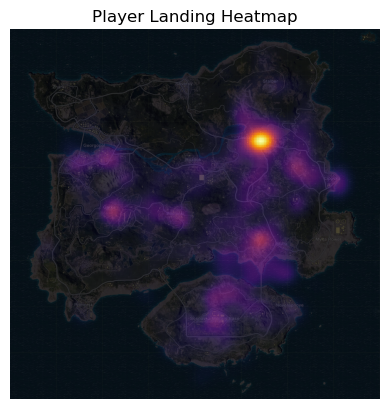

In [135]:
from scipy.ndimage import gaussian_filter

fig2, ax2 = plt.subplots()

heatmap, xedges, yedges = numpy.histogram2d(xloc, yloc, bins=150, range=[[0, 800000], [0, 800000]])
heatmap = gaussian_filter(heatmap, 3)
extent = (0, 800000, 800000, 0)
plt.imshow(heatmap.T, zorder=2,alpha=1,cmap=my_cmap, extent = [xedges[0], xedges[-1], yedges[-1], yedges[0]])
implot = plt.imshow(im,zorder=1, extent=extent)
ax2.axis('off')
ax2.set_title('Player Landing Heatmap')
plt.show()

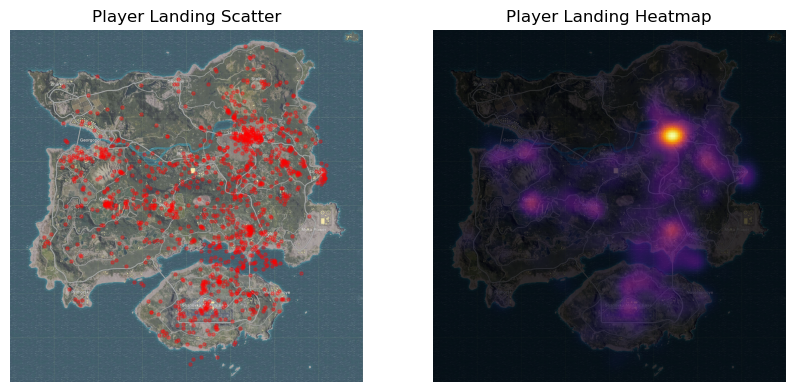

In [136]:
from scipy.ndimage import gaussian_filter

xloc = bigboy_df['Landed Location'].apply(pd.Series)['x']
yloc = bigboy_df['Landed Location'].apply(pd.Series)['y']

fig3, ax3 = plt.subplots(1,2, figsize=(10, 6))

extent = (0, 800000, 800000, 0)


ax3[0].scatter(xloc,yloc, s=5, c='red',alpha=0.3)
ax3[0].imshow(im, alpha=0.8, extent=extent)
ax3[0].set_title('Player Landing Scatter')
ax3[0].axis('off')

heatmap, xedges, yedges = numpy.histogram2d(xloc, yloc, bins=150, range=[[0, 800000], [0, 800000]])
heatmap = gaussian_filter(heatmap, 3)
ax3[1].imshow(im, alpha=1, extent=extent)
ax3[1].imshow(heatmap.T, extent=extent,cmap=my_cmap)
ax3[1].set_title('Player Landing Heatmap')
ax3[1].axis('off')

plt.show()

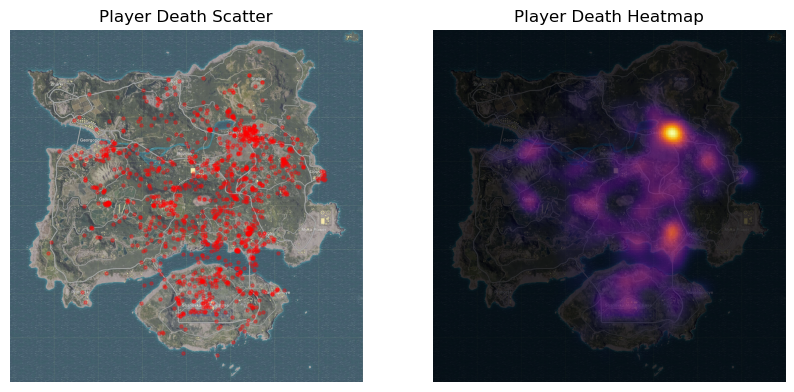

In [137]:
xloc = bigboy_df.dropna(subset='Death Location')['Death Location'].apply(pd.Series)['x']
yloc = bigboy_df.dropna(subset='Death Location')['Death Location'].apply(pd.Series)['y']

fig4, ax4 = plt.subplots(1,2, figsize=(10, 6))


ax4[0].scatter(xloc,yloc, s=5, c='red',alpha=0.3)
ax4[0].imshow(im, alpha=0.8, extent=extent)
ax4[0].set_title('Player Death Scatter')
ax4[0].axis('off')

heatmap, xedges, yedges = numpy.histogram2d(xloc, yloc, bins=150, range=[[0, 800000], [0, 800000]])
heatmap = gaussian_filter(heatmap, 3)
ax4[1].imshow(im, alpha=1, extent=extent)
ax4[1].imshow(heatmap.T, extent=extent,cmap=my_cmap)
ax4[1].set_title('Player Death Heatmap')
ax4[1].axis('off')

plt.show()

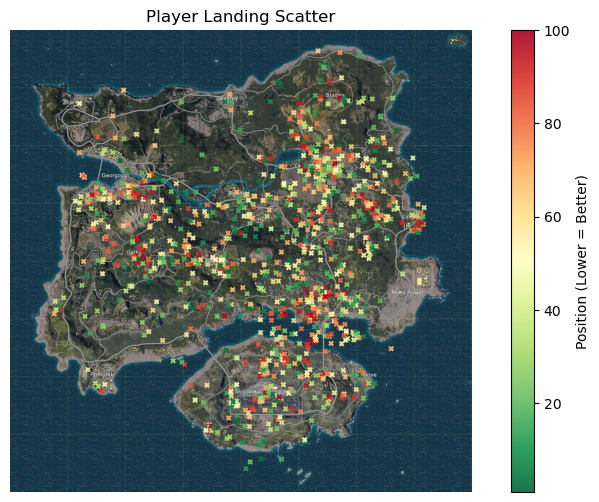

In [138]:
xloc = bigboy_df['Landed Location'].apply(pd.Series)['x']
yloc = bigboy_df['Landed Location'].apply(pd.Series)['y']
posit = bigboy_df['Position']
fig5, ax5 = plt.subplots(figsize=(10, 6))

extent = (0, 800000, 800000, 0)


p = ax5.scatter(xloc,yloc, s=9,alpha=0.9, c=posit, cmap='RdYlGn_r', marker='x')
ax5.imshow(im, alpha=1, extent=extent)
ax5.set_title('Player Landing Scatter')
ax5.axis('off')

#p = ax.scatter(x, y, c=y, cmap='cmo.deep')
fig5.colorbar(p,ax=ax5,orientation='vertical',label='Position (Lower = Better)')

plt.show()

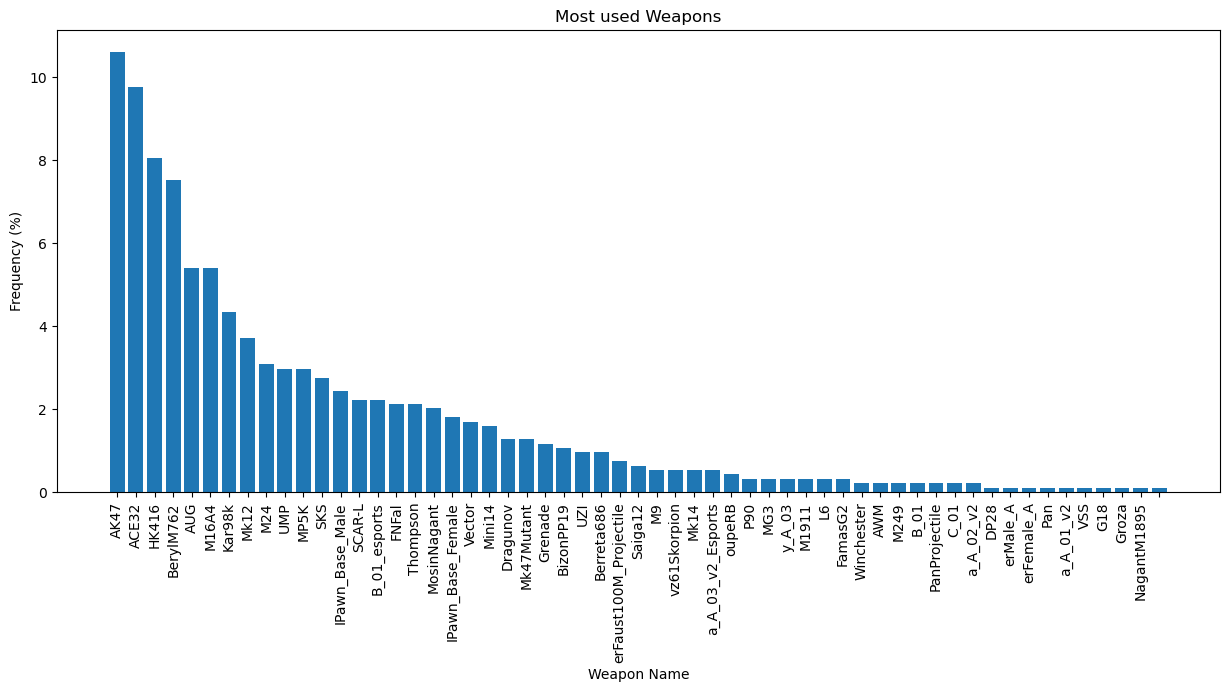

In [148]:
weapons_df = pd.DataFrame(bigboy_df['Weapons Used']).explode('Weapons Used', ignore_index = True)
freq_df = pd.DataFrame(weapons_df.value_counts('Weapons Used', dropna=True).reset_index())
norm_df = pd.DataFrame(weapons_df.value_counts('Weapons Used', dropna=True, normalize=True).reset_index())
fig6, ax6 = plt.subplots(figsize=(15, 6))


ax6.bar(freq_df['Weapons Used'],norm_df['proportion']*100)
ax6.set_title('Most used Weapons')
plt.ylabel('Frequency (%)')
plt.xlabel('Weapon Name')
plt.xticks(rotation=90)
plt.show()

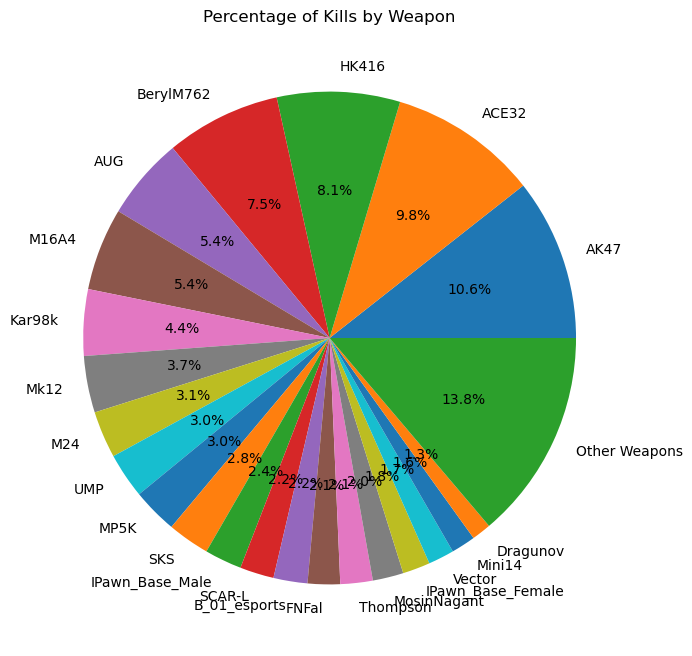

In [160]:
amt = 35
new_row = pd.DataFrame(data = {
    'Weapons Used' : ['Other Weapons'],
    'proportion' : [norm_df.tail(amt)['proportion'].sum()]
})

#combining top 5 with others
fixed = norm_df.drop(norm_df.tail(amt).index)

fixed = pd.concat([fixed, new_row])

fig7, ax7 = plt.subplots(figsize=(8,8))
ax7.pie(fixed['proportion'], labels=fixed['Weapons Used'], autopct='%1.1f%%')
ax7.set_title('Percentage of Kills by Weapon')
plt.show()
#norm_df['proportion'][-5:]
#norm_df

In [194]:
high_df = pd.DataFrame(bigboy_df[(bigboy_df['Position']<=15)]['Weapons Used'].explode('Weapons Used')).reset_index()
high_df = high_df.value_counts('Weapons Used', dropna=True, normalize=True).reset_index()
high_df.head()

newer_row = pd.DataFrame(data = {
    'Weapons Used' : ['Other Weapons'],
    'proportion' : [high_df.tail(35)['proportion'].sum()]
})
higher_df = pd.DataFrame()
#combining top 5 with others
higher_df = high_df.drop(high_df.tail(35).index)

higher_df = pd.concat([higher_df, newer_row])
higher_df

,Weapons Used,proportion
0,BerylM762,0.101124
1,ACE32,0.087640
2,AK47,0.078652
3,HK416,0.067416
4,Kar98k,0.056180
5,Mk12,0.056180
6,AUG,0.044944
7,B_01_esports,0.038202
8,MosinNagant,0.038202
9,M24,0.035955


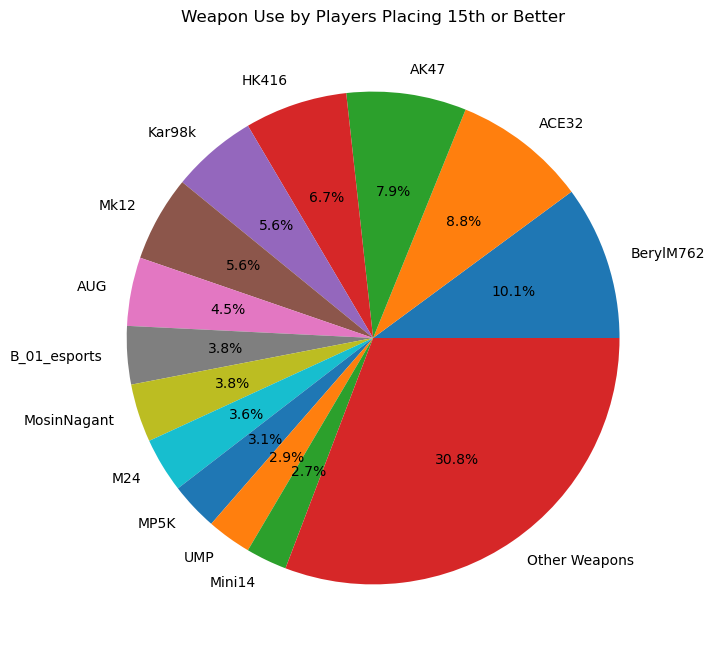

In [195]:
fig10, ax10 = plt.subplots(figsize=(8,8))
ax10.pie(higher_df['proportion'], labels=higher_df['Weapons Used'], autopct='%1.1f%%')
ax10.set_title('Weapon Use by Players Placing 15th or Better')
plt.show()

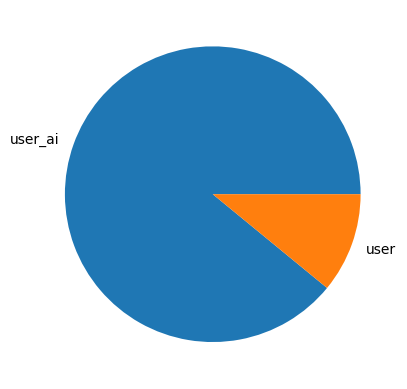

,Type,proportion
0,user_ai,0.890651
1,user,0.109349


In [196]:
ai_df = pd.DataFrame(bigboy_df['Type'].value_counts(normalize=True).reset_index())
fig8, ax8 = plt.subplots()
ax8.pie(ai_df['proportion'],labels=ai_df['Type'])
plt.show()
ai_df

In [197]:
bigboy_df[(bigboy_df['Position']==10)]

,Position,Player,Type,Death Location,Death Reason,Weapons Used,Kills,Dmg Dealt,Dist Walked,Longest Kill,Time Survived,Landed Location,Vehicle Ridden
66,10,gzt152415,user,"{'x': 358511.8125, 'y': 113070.0703125, 'z': 5...",,"[VSS, Mk12, Mk12, Mk12, Mk12, AUG, Mk12, AUG, ...",9,790.154540,1189.7878,253.651780,1049,"{'x': 84780.6796875, 'y': 479324.875, 'z': 330...","[BP_Bicycle_C, BP_Motorbike_04_C, Buggy_A_03_C]"
136,10,KK_AnGst95,user,"{'x': 381858.34375, 'y': 608036.0625, 'z': 123...",NonSpecific,"[ACE32, ACE32, AUG]",3,358.335000,1445.4464,64.457460,994,"{'x': 577557.8125, 'y': 117370.09375, 'z': 247...","[Uaz_B_01_C, Dacia_A_03_v2_Esports_C]"
213,10,IF__John-HS,user_ai,"{'x': 340188.71875, 'y': 465629.9375, 'z': 848...",HeadShot,[AK47],1,228.054840,3118.5034,0.000000,1305,"{'x': 133455.984375, 'y': 425075.15625, 'z': 5...",NaN
346,10,Sky__Style_ya,user_ai,"{'x': 574093.8125, 'y': 641673.3125, 'z': 9785...",TorsoShot,NaN,0,35.441154,2347.9658,0.000000,1240,"{'x': 631561.0625, 'y': 611582.3125, 'z': 108....",NaN
498,10,wanglpeeng,user,"{'x': 375859.1875, 'y': 236376.65625, 'z': 508...",NonSpecific,"[UMP, MP5K, Kar98k, MP5K, Kar98k]",5,473.400020,2830.8943,135.866010,1063,"{'x': 474135.78125, 'y': 489092.4375, 'z': 289...",[BP_CoupeRB_C]
514,10,IissenK,user_ai,"{'x': 410099.8125, 'y': 637639.0625, 'z': 219....",,NaN,0,0.000000,1415.4135,0.000000,1151,"{'x': 430942.5, 'y': 718253.5625, 'z': 426.454...",NaN
688,10,mi__vely96,user_ai,"{'x': 536190.875, 'y': 309408.8125, 'z': 1611....",HeadShot,[ACE32],1,98.000000,2785.5889,0.000000,1307,"{'x': 466631.6875, 'y': 496528.75, 'z': 102.59...",NaN
702,10,Abh_az_,user_ai,"{'x': 319930.28125, 'y': 303705.5625, 'z': -28...",,[M16A4],1,100.000000,1696.4581,0.000000,1016,"{'x': 334170.78125, 'y': 367998.34375, 'z': 15...",NaN
889,10,puppet-_o,user_ai,"{'x': 341992, 'y': 464619.5, 'z': 821.00408935...",,"[Thompson, HK416, Thompson]",3,300.000000,2986.6143,0.000000,1110,"{'x': 511075.84375, 'y': 362988.6875, 'z': 434...",NaN
986,10,mein-Sc_hatz,user_ai,"{'x': 663528.875, 'y': 291621.90625, 'z': 922....",HeadShot,"[Berreta686, ACE32]",2,275.368560,2035.0933,0.000000,1210,"{'x': 706615.8125, 'y': 350612.78125, 'z': 769...",NaN


In [198]:
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import math

In [199]:
cars_df = pd.DataFrame()
fixed = pd.DataFrame(bigboy_df['Vehicle Ridden'].fillna(0))
for x in range(len(bigboy_df)):
    if fixed['Vehicle Ridden'][x]==0:
        cars_df = pd.concat([cars_df, pd.DataFrame({
        "Position": [bigboy_df['Position'][x]],
        "Driven": [0]
        })], ignore_index=True)
    else:
        cars_df = pd.concat([cars_df, pd.DataFrame({
        "Position": [bigboy_df['Position'][x]],
        "Driven": [1]
        })], ignore_index=True)
cars_df.head(5)

,Position,Driven
0,95,0
1,75,0
2,70,0
3,49,0
4,63,0


In [200]:
cars_df.corr()


,Position,Driven
Position,1.000000,-0.366522
Driven,-0.366522,1.000000
